# Functionality 2

### Import pakages:

In [1]:
# pip install decorator==5.0.9
import pandas as pd
import networkx as nx
import pickle
import math
import heapq
import matplotlib.pyplot as plt

### Functions:

In [2]:
def BellmanFord(graph, id_root):
    
    '''BellmanFord is an algorithm for shorest paths between a node and  all other nodes for weighted graph.
    
        Time complexity:
            - O(VE) with V number of nodes and E number of edges. 
            
        Args:
            - graph, a graph as networkx object.
            - id_root, the id of a node as integer. 
            
        Returns:
            - vertex, a list containing the nodes of the graph.
            - distance, a vector containing the computed distance between the root and the other nodes. The lenght is equal to the number of nodes 
            and the order is the  same of nodes (the distance of vertex[i] is given by distance[i]).
            - prede, a vector containing the index of the pedecessor of each node (the predecessor of vertex[i] is  given by vertex[prede[i]]).
        '''

    n = graph.number_of_nodes()
    vertex = list(graph.nodes())
    id_root_index =  vertex.index(id_root)
    
    distance = [math.inf] * n
    prede =['Na'] * n
    
    distance[id_root_index] = 0             
    
    edges = list(graph.edges(node_id, data = 'weight', keys = True))
    
    for i in range(0,n-1):
        
        for u, v, t, w  in edges:
            
            idex_u = vertex.index(u)
            index_v = vertex.index(v)
                
            if distance[index_u] + w < distance[index_v]:
                
                distance[index_v] = distance[index_u] + w
                
                pred[index_v] = index_u

    return distance, prede, vertex

In [3]:
def page_rank(graph, num_iter, node_id, d = 0.85):
    
    '''The function computes the page rank of a given node in a given graph.
        
        Args:
            - graph, a graph as networkx object.
            - num_iter, number of iterations as integer. Its value determins the convergence of the page ranks.
            - node_id, the id of a node as integer.
            - d, damping factor as float. Google s algorithm use 0,85 as default value.
        
        Returns:
            - The page rank of the given node '''
    
    n = graph.number_of_nodes()
    
    nodes = list(graph.nodes())
    
    page_rank = [1/n] * n
    
    i = 0
    
    while i < num_iter:
        
        for v in nodes:
            
            v_index = nodes.index(v)
            
            v_in_edges = list(graph.in_edges(v, data = 'weight', keys = True))
            
            sommatoria = 0
            
            for u, _, t, w in v_in_edges:
                
                u_index = nodes.index(u)
                
                c_u = len(list(graph.out_edges(u)))
                
                sommatoria += page_rank[u_index]/c_u
                
            page_rank[v_index] = ((1 - d) / n) + (d * (sommatoria)) 
        
        i += 1
            
    node_id_index = nodes.index(node_id)
    
    return (page_rank[node_id_index])

In [73]:
def n_shortest(graph, source):
    '''It is an adaptation of Dijkstra that computes the number of shortest pasths between a root node and all other nodes in a given directed weighted graph.
        
        Args:
            -graph, a graph as networkx object.
            -source, the id of the root node as integer.
        Returns:
            -nodes, a list containing all the nodes.
            -paths, a list containing the number of shortest paths between the root node and all other nodes in the graph 
                (the number of shortest path between the root and the nodes[i] is path[i]).
            -distance, a list containing the distance between the root and all the nodes (the distance between the root and the nodes[i] is distance[i]).
            '''
    n = graph.number_of_nodes()
    nodes = list(graph.nodes())
    index_source = nodes.index(source)
    
    distance = [math.inf] * n
    paths = [0] * n
    queue = []
    
    distance[index_source] = 0
    paths[index_source] = 1
    heapq.heappush(queue,(0,str(source)))
    
    while queue != []:
        
        length, current = heapq.heappop(queue)
        
        curr_index = nodes.index(int(current))
        
        out_edges = list(graph.out_edges(int(current),data = 'weight',keys = True))
        
        for _, v, t, w in out_edges:
            
            v_index = nodes.index(v)
            
            if distance[v_index] > (distance[curr_index] + w) :
                
                heapq.heappush(queue,(length + w, str(v)))
                
                distance[v_index] = distance[curr_index] + w
                
                paths[v_index] = paths[curr_index]
            
            elif distance[v_index] == (distance[curr_index] + w) :
                
                paths[v_index] = paths[v_index] + paths[curr_index]
                
    
    
    return paths, distance, nodes

In [5]:
def n_shortest_avoiding(graph, source, node_to_avoid):
    
    '''It is an adaptation of Dijkstra that computes the number of shortest pasths between a root node and all other nodes in a given directed weighted graph
        avoiding all the paths that go through a given node.
        
        Args:
            -graph, a graph as networkx object.
            -source, the id of the root node as integer.
            -node_to_avoid, the id of the node to avoid as integer
        Returns:
            -nodes, a list containing all the nodes.
            -paths, a list containing the number of shortest paths between the root node and all other nodes in the graph 
                (the number of shortest path between the root and the nodes[i] is path[i]). The distance to the node to avoid is 0, the same happens
                if does not exist any path between the root and a node.
            -distance, a list containing the distance between the root and all the nodes
                (the distance between the root and the nodes[i] is distance[i]). the distance to the node to avoid is inf, the same happens
                if does not exist any path between the root and a node.
            '''
    
    n = graph.number_of_nodes()
    nodes = list(graph.nodes())
    index_source = nodes.index(source)
    
    distance = [math.inf] * n
    paths = [0] * n
    queue = []
    
    distance[index_source] = 0
    paths[index_source] = 1
    heapq.heappush(queue,(0,str(source)))
    
    while queue != []:
        
        length, current = heapq.heappop(queue)
        
        curr_index = nodes.index(int(current))
        
        out_edges = list(graph.out_edges(int(current),data = 'weight',keys = True))
        
        for _, v, t, w in out_edges:
            
            if v == node_to_avoid:
                
                w_v = math.inf
                
            else:
                
                w_v = w
            
            v_index = nodes.index(v)
            
            if distance[v_index] > (distance[curr_index] + w_v) :
                
                heapq.heappush(queue,(length + w, str(v)))
                
                distance[v_index] = distance[curr_index] + w
                
                paths[v_index] = paths[curr_index]
            
            elif distance[v_index] == (distance[curr_index] + w_v) :
                
                paths[v_index] = paths[v_index] + paths[curr_index]
                
    return paths, distance, nodes

In [6]:
def betweenness(graph, node_id):
    '''The function compute the betweennes centrality  of given node in a graph.
        
        Args:
            -graph, a graph as networkx object.
            -node_id, the id of a node as integer.
        
        Returns:
            -betweenness, the betweenness centrality of the given node.
            '''
    nodes = list(graph.nodes())
    
    betweenness = 0
    
    nta_index = nodes.index(node_id)
    
    for i in nodes:
        
        if i != node_id:
            
            paths1, dist1, _= n_shortest(graph, i)
            
            del paths1[nta_index]
            
            del dist1[nta_index]
            
            paths2, dist2, _ = n_shortest_avoiding(graph, i, node_id)
            
            del paths2[nta_index]
            
            del dist2[nta_index]
            
            for j in range(paths1):
                
                if dist1[j] < dist2[j] and paths1[j] != 0:
                    
                    betweenness += 1
                    
                if dist1[j] == dist2[j] and paths1[j] != 0 :
                    
                    numerator = paths1[j] - paths2[j]
                    
                    betweenness += numerator/paths1[j]
                    
        else:
            
            continue
            
    return betweenness

In [68]:
def sub_graph(graph, starting_date, ending_date):
    '''The function compute the sub-graph of a temporal directed graph in a given interval of time.
        
        Args:
            -graph, a graph as networkx object.
            -starting_date, the starting date as string with this format YYYY-MM-DD.
            -ending_date, the ending date as string with this format YYYY-MM-DD.
        
        Returns:
            -sub_g, a graph as networkx object.'''
    
    
    sub_g = nx.MultiDiGraph()
    
    for u,v,t in list(g.edges):
        
        if t >= pd.to_datetime(starting_date) and t <= pd.to_datetime(ending_date):
            
            w = g.get_edge_data(u,v,t)['weight']
            
            sub_g.add_edge(u,v,t,weight = w)
                
    return sub_g

In [69]:
def sub_graph_2(graph, node_id):
    
    '''The function computes the sub-graph of a given graph (directed) taking only a given node and its neighbors.
        
        Args:
            -graph, a graph as networkx object.
            -node_id, an id of a node as integer.
        
        Returns:
            -sub_g, a graph as networkx object.
        '''
    
    sub_g = nx.MultiDiGraph()
    
    out_edges = list(graph.out_edges(node_id, data = 'weight', keys = True))
    
    in_edges = list(graph.in_edges(node_id, data = 'weight', keys = True))
    
    for u, v, t, w in out_edges:
        
        sub_g.add_edge(u, v, t, weight = w)
        
    for u, v, t, w in in_edges:
        
        sub_g.add_edge(u, v, t, weight = w)
    
    return sub_g

In [70]:
def Functionality2 (node_id, starting_date, ending_date, metric, graph):
    
    '''The function computes the choosen centrality metric of a given node. The graph is a directed temporal graph. 
    The metric is computed only on the sub-graph generated by the choosen interval of time.
        
        Args:
            -node_id, an id of a node as integer.
            -starting_date, the starting date as string with this format YYYY-MM-DD.
            -ending_date, the ending date as string with this format YYYY-MM-DD.
            -metric, a metric as string choosen between: Betweenness, DegreeCentrality, ClosenessCentrality, PageRank.
            -graph, a graph as networkx object.
        
        Returns:
            - the value of the choosen centrality for the given node.
            '''
        
        
    if node_id in list(graph.nodes()):
        
        sub_g = sub_graph(graph, starting_date, ending_date)
                    
        n = sub_g.number_of_nodes()
        
        if n == 0:
            
            return('The graph does not contain any node')
        
        else:
            if metric == 'Betweenness':
                
                return ('Betweenness: ' + str(betweenness(sub_g, node_id)))
                
            elif metric == 'DegreeCentrality':
                
                edges = list(sub_g.edges(node_id, data = 'weight', keys = True))
            
                w_edges = 0
            
                for _, _, _, w in edges:
                
                    w_edges += w
                
                return ('DegreeCentrality: ' + str(w_edges/(n-1)))
            
            elif metric == 'ClosenessCentrality':
                
                distance, _, _ = BellmanFord(sub_g, node_id)
                
                return ('ClosenessCentrality: ' + str((n-1)/sum(distance)))
            
            elif metric == 'PageRank':
                
                return ('PageRank: ' + str(page_rank(sub_g, 100, node_id = node_id, d = 0.85)))
                   
    else:
        return('the node does not belong to the graph')
    
    
    
    

In [72]:
def visualize_fun_2(graph, node_id, starting_date, ending_date, metric):
    
    '''The function computes the choosen centrality metric of a given node. The graph is a directed temporal graph. 
    The metric is computed only on the sub-graph generated by the choosen interval of time. The fuction also plots
    the given node and its neighbors.
        
        Args:
            -node_id, an id of a node as integer.
            -starting_date, the starting date as string with this format YYYY-MM-DD.
            -ending_date, the ending date as string with this format YYYY-MM-DD.
            -metric, a metric as string choosen between: Betweenness, DegreeCentrality, ClosenessCentrality, PageRank.
            -graph, a graph as networkx object.
        
        Returns:
            -The node and its neighbors. it also print the metric and its value.
    '''
    
    m = Functionality2 (node_id, starting_date, ending_date, metric, graph)
    
    print(m)
    
    sub_g = sub_graph(graph, starting_date, ending_date)
    
    sub_g = sub_graph_2(sub_g, node_id)
    
    n = sub_g.number_of_nodes()
    
    nx.draw_networkx(sub_g ,arrows = True, with_labels = False, node_color = ['Red'] + (['Blue'] * (n - 1)))
    

## Load Graphs:

### Answers graph

In [10]:
answers = pd.read_csv("sx-stackoverflow-a2q.txt", sep = " ", header = None, names = ['Active_User', 'Passive_User', 'Date'])

In [11]:
answers["Date"] = pd.to_datetime(answers['Date'], unit = 's')

In [12]:
Recent_answers = answers[(answers['Date'] >= '2016-01-01') & (answers["Active_User"] != answers["Passive_User"])].copy()

In [13]:
Recent_answers["weight"] = 1

In [14]:
g1 = nx.from_pandas_edgelist(Recent_answers, "Active_User", "Passive_User", edge_attr = 'weight', create_using = nx.MultiDiGraph(), edge_key = "Date")

### Comments to questions graph

In [16]:
comments_onQuestions = pd.read_csv("sx-stackoverflow-c2q.txt", sep = " ", header = None, names = ['Active_User', 'Passive_User', 'Date'])

In [17]:
comments_onQuestions["Date"] = pd.to_datetime(comments_onQuestions['Date'], unit = 's')

In [18]:
Recent_comments_onQuestions = comments_onQuestions[(comments_onQuestions['Date'] >= '2016-01-01') & (comments_onQuestions["Active_User"] != comments_onQuestions["Passive_User"])].copy()

In [19]:
Recent_comments_onQuestions["weight"] = 0.4

In [20]:
g2 = nx.from_pandas_edgelist(Recent_comments_onQuestions, "Active_User", "Passive_User",edge_attr = 'weight',create_using=nx.MultiDiGraph(),edge_key="Date")

### Comments to answers graph

In [21]:
comments_onAnswers = pd.read_csv("sx-stackoverflow-c2a.txt", sep = " ", header = None, names = ['Active_User', 'Passive_User', 'Date'])

In [22]:
comments_onAnswers["Date"] = pd.to_datetime(comments_onAnswers['Date'], unit = 's')

In [23]:
Recent_comments_onAnswers = comments_onAnswers[(comments_onAnswers['Date'] >= '2016-01-01') & (comments_onAnswers["Active_User"] != comments_onAnswers["Passive_User"])].copy()

In [24]:
Recent_comments_onAnswers["weight"] = 0.6

In [25]:
g3 = nx.from_pandas_edgelist(Recent_comments_onAnswers, "Active_User", "Passive_User", edge_attr = 'weight', edge_key = "Date",create_using = nx.MultiDiGraph()) 

### Combining Graphs

In [26]:
g = nx.compose(g1,g2)

In [27]:
g = nx.compose(g, g3)

## Visualize graph and metrics

In [49]:
node = 3877963

In [50]:
sd = '2016-01-01'
ed = '2016-06-01'

In [51]:
m = 'DegreeCentrality'

DegreeCentrality: 1.7702536820111944e-05
ciao


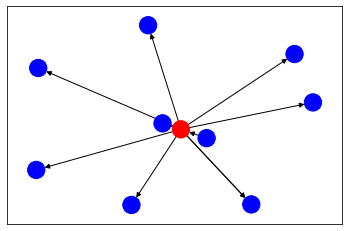

In [71]:
visualize_fun_2(g, node, sd, ed, m)